# Windowsパフォーマンスログ可視化サンプル

## 動作設定

In [1]:
# 入力ファイル
input = "data/Sample01.csv"

## ライブラリ

In [2]:
import os
import json

import PerflogVisualise.windows as winperf

## データ読み込み

In [3]:
svname, df = winperf.read_perflog(input)

## 可視化設定

In [4]:
basicConfig = {
    "Name": "Name",
    "resultDir": "result",
    "resultFile": "ResultFile",
    "dataset": [
        {
            "title": "Memory Usage",
            "xlabel": "Time",
            "ylabel": "Memory",
            "cols": [
                {
                    "x": "Time",
                    "y": "Memory\Available MBytes",
                    "label": "Memory\Available MBytes",
                }
            ],
            "x_data_point": 20
        },
        {
            "title": "CPU Usage",
            "xlabel": "Time",
            "ylabel": "Processor Time",
            "ylim": [0, 100],
            "cols": [
                {
                    "x": "Time",
                    "y": "Processor(_Total)\% User Time",
                    "label": "Processor(_Total)\% User Time",
                    "color": "Blue"
                },
                {
                    "x": "Time",
                    "y": "Processor(_Total)\% Processor Time",
                    "label": "Processor(_Total)\% Processor Time",
                    "color": "Red"
                },
                {
                    "x": "Time",
                    "y": "Processor(_Total)\% Privileged Time",
                    "label": "Processor(_Total)\% Privileged Time",
                    "color": "Green"
                }
            ]
        },
        {
            "title": "Memory Usage Percent",
            "xlabel": "Time",
            "ylabel": "Memory Usage",
            "ylim": [0, 100],
            "cols": [
                {
                    "x": df["Time"],
                    "y": 100 * (8192 - df["Memory\Available MBytes"]) / 8192,
                    "label": "Memory Usesage %"
                }
            ],
            "x_data_point": 20
        }
    ]
}

## Windowsパフォーマンスデータ可視化

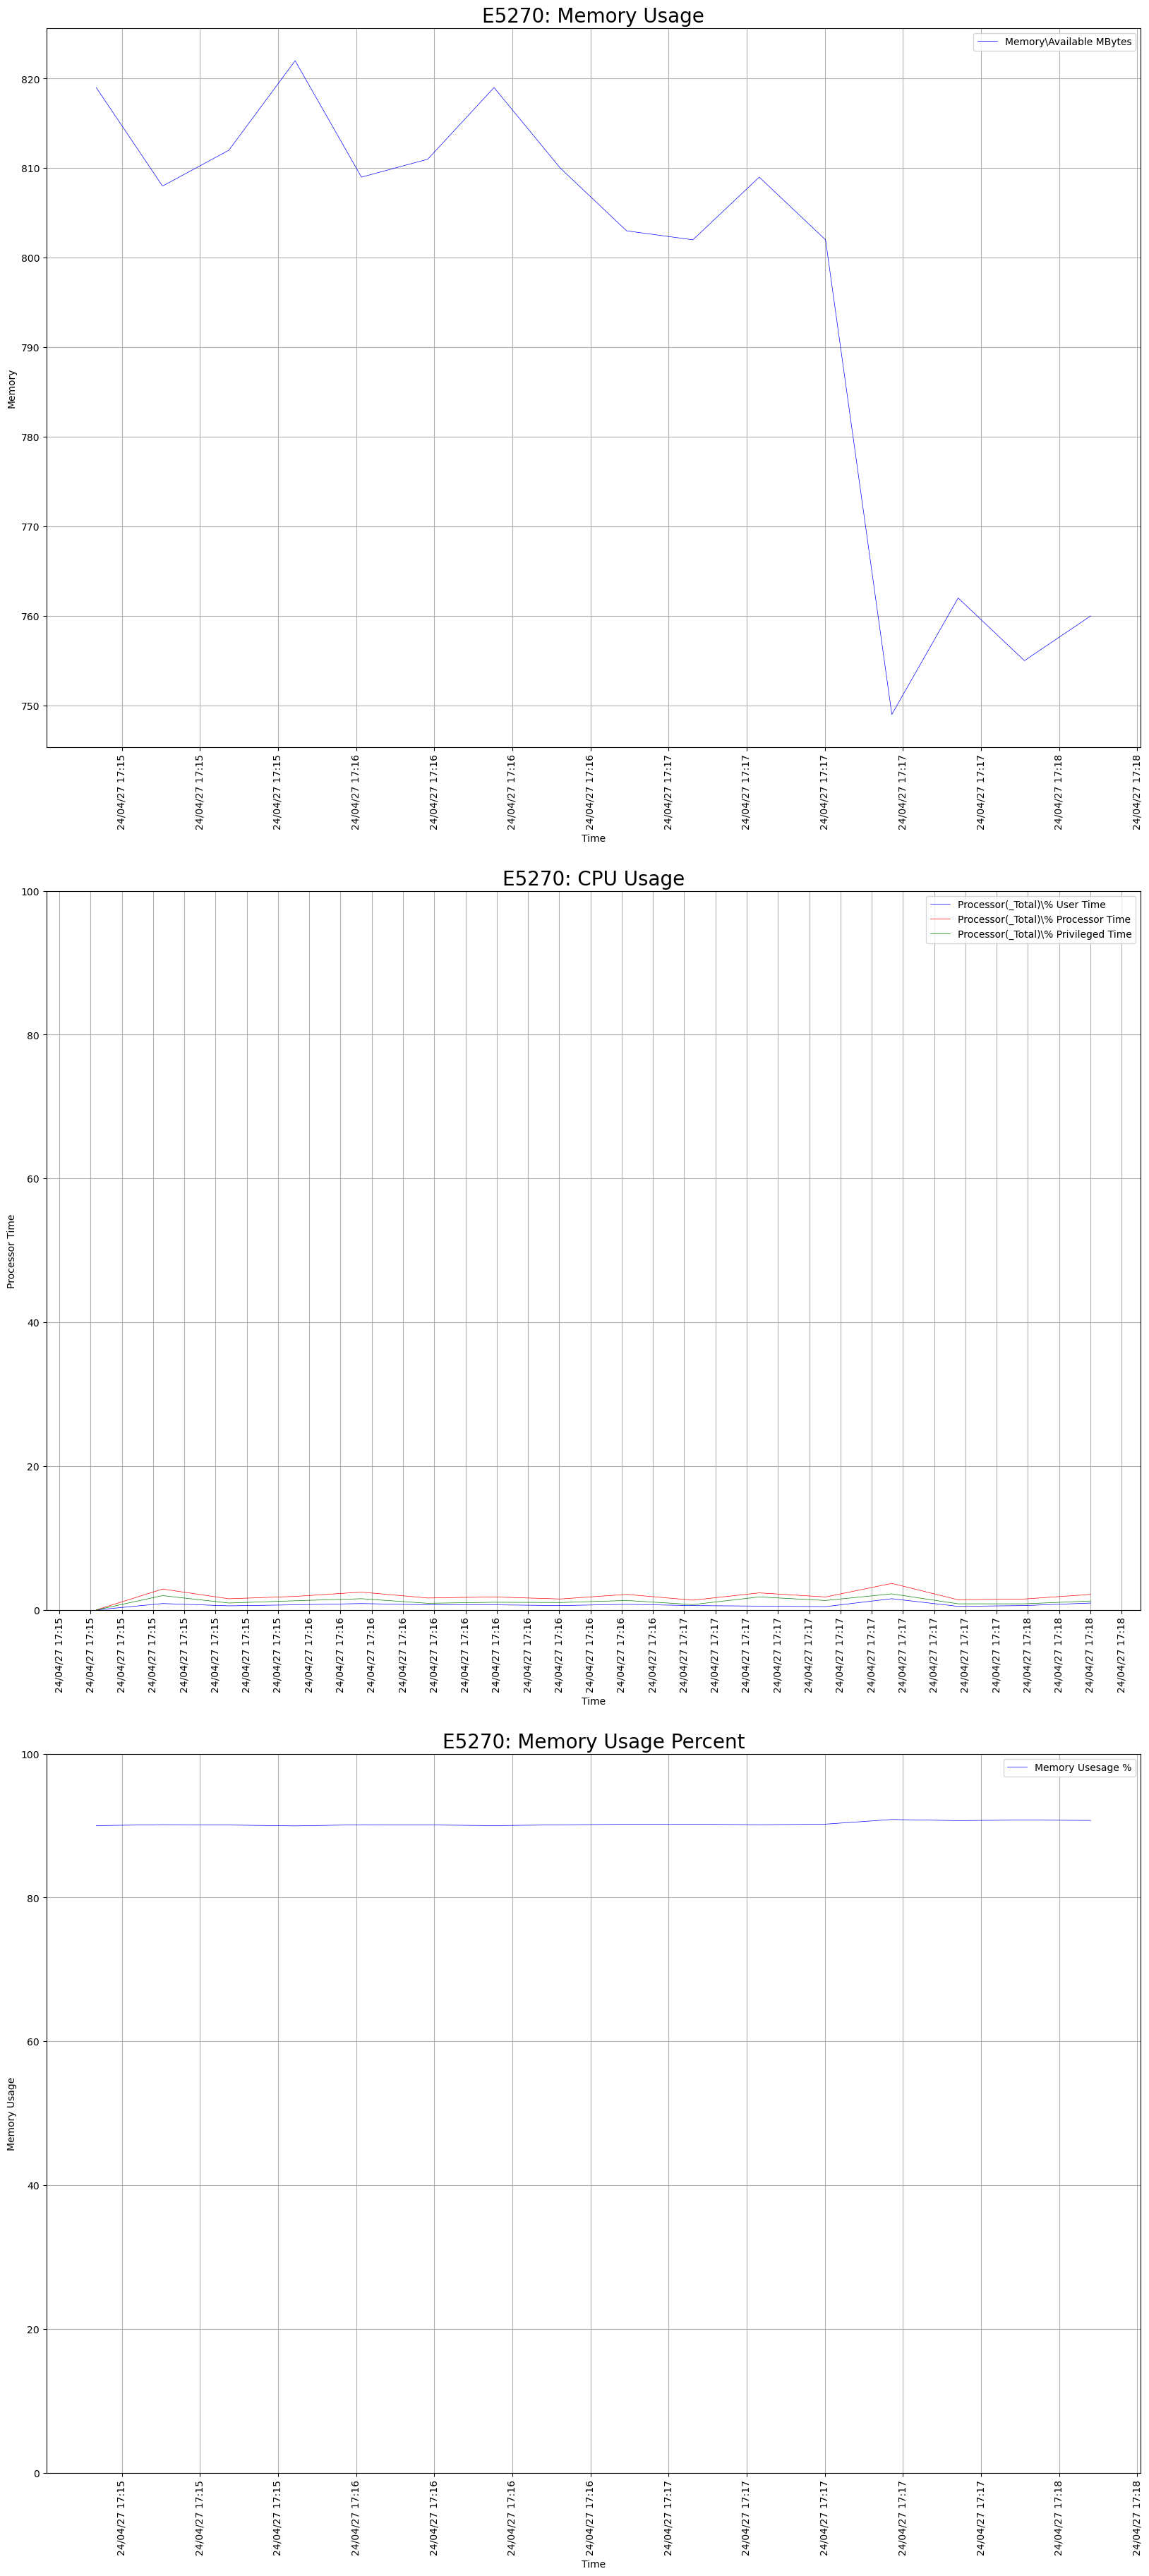

In [5]:
config = basicConfig.copy()
config["Name"] = f"{svname}"
config["resultFile"] = f"{svname}_result"
winperf.makePerfGraph(data = df, config = config)